In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu

# WILD WITH FATHER

In [12]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_with_father'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]

In [13]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [14]:
def load_subject(subject):
    df_mouse = pd.read_csv(data_directory + subject + '/cells_700.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    return df_mouse

In [15]:
# NB: Run only if file does not exist or needs to be regenerated
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject), 
                                                                          vol=volumes, 
                                                                          level=8) for subject in subjects}
np.save('dict_results/dict_results_across_mice_WILD_with_father.npy', dict_results_across_mice)

/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/pytho

In [16]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_WILD_with_father.npy', 
                                   allow_pickle=True).item()

In [17]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)


In [18]:
experimental_groups

{'Control': ['W10Control',
  'W38Control',
  'W26Control',
  'W15Control',
  'W31Control',
  'W23Control',
  'W7Control',
  'W29Control',
  'W3Control',
  'W17Control'],
 'Unfam': ['W27Unfam',
  'W20Unfam',
  'W2Unfam',
  'W11Unfam',
  'W13Unfam',
  'W18Unfam',
  'W33Unfam',
  'W21Unfam'],
 'Fam': ['W14Fam',
  'W16Fam',
  'W25Fam',
  'W5Fam',
  'W40Fam',
  'W36Fam',
  'W8Fam',
  'W34Fam']}

## Calculate number of cells

In [19]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [20]:
df_ttest_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count)
df_ttest_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.33568,0.948821,0.331532
1,Primary motor area,0.271418,0.164903,0.835822
2,Secondary motor area,0.802823,0.668387,0.614473
3,Primary somatosensory area,0.453852,0.617921,0.761647
4,Supplemental somatosensory area,0.610406,0.610581,0.953665
...,...,...,...,...
194,Interfascicular nucleus raphe,0.899006,0.764696,0.663883
195,Interpeduncular nucleus,0.94766,0.692989,0.663471
196,Rostral linear nucleus raphe,0.588049,0.830289,0.432247
197,Central linear nucleus raphe,0.439391,0.351677,0.878365


In [21]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [22]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Posterior amygdalar nucleus,0.00281192
Septofimbrial nucleus,0.0117276
Intergeniculate leaflet of the lateral geniculate complex,0.0369201
Ventral premammillary nucleus,0.043043
Lateral visual area,0.0709106
Entorhinal area,0.0783027
Ventrolateral preoptic nucleus,0.0970912
Medial amygdalar nucleus,0.101226
Cortical amygdalar area,0.102319


In [23]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Posterior amygdalar nucleus,0.00025259
Ventral premammillary nucleus,0.00129424
Medial amygdalar nucleus,0.00501819
Entorhinal area,0.00579748
Postpiriform transition area,0.00779129
Lateral visual area,0.011054
Intercalated amygdalar nucleus,0.0133758
Subiculum,0.0143626
Cortical amygdalar area,0.0154097


In [24]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Primary visual area,0.0672245
Ventral auditory area,0.0678172
Bed nucleus of the anterior commissure,0.0940359
Anterior amygdalar area,0.116545
Piriform area,0.125909
Medial amygdalar nucleus,0.130213
Intercalated amygdalar nucleus,0.154826
Entorhinal area,0.155943
Posterodorsal preoptic nucleus,0.164922


## Calculate corr matrices on number of cells

In [25]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

Text(0.5, 1.0, 'CONTROL')

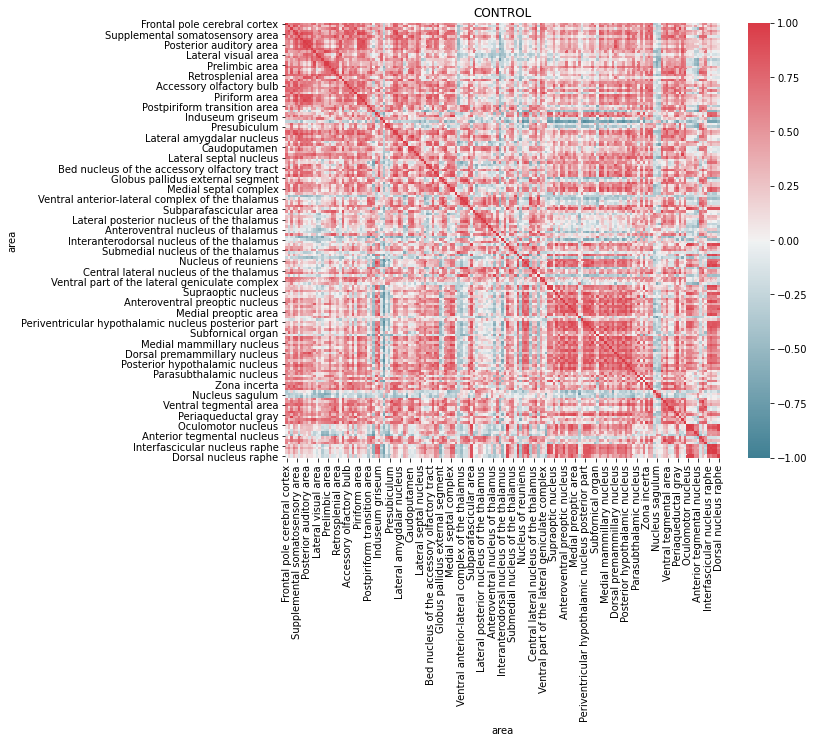

In [26]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

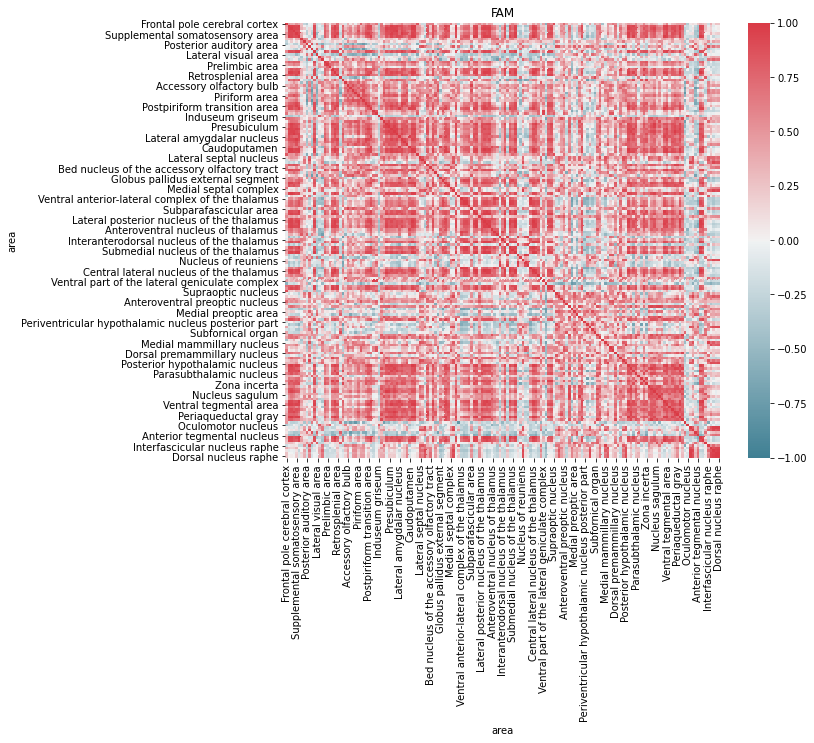

In [27]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

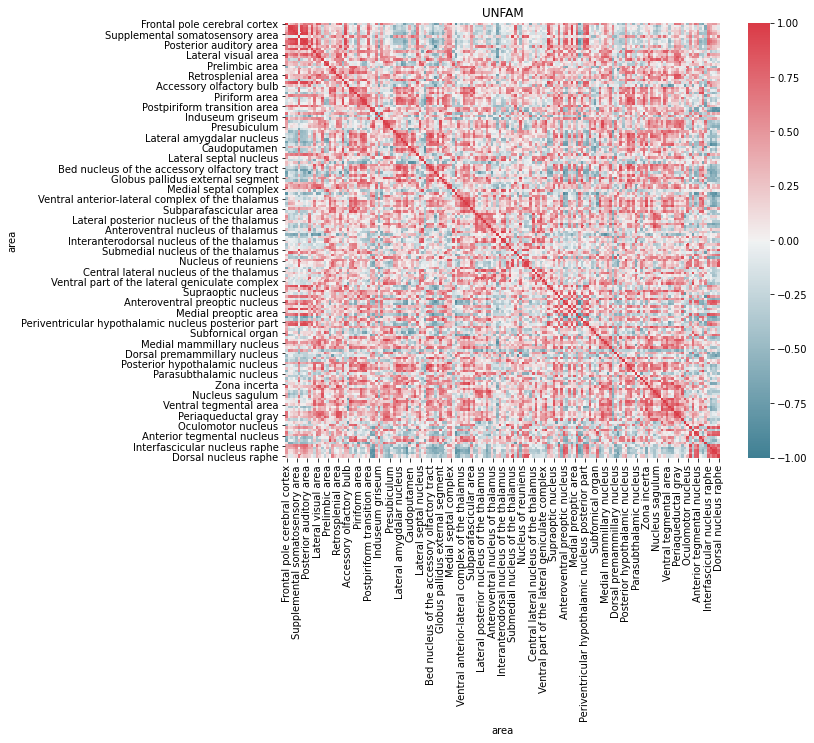

In [28]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

## Calculate energy

In [29]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

In [30]:
df_ttest_energy = ace.test_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy)

In [31]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [32]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Posterior amygdalar nucleus,0.00122757
Septofimbrial nucleus,0.00435459
Cortical amygdalar area,0.049334
Lateral visual area,0.070523
Ventrolateral preoptic nucleus,0.0886069
Nucleus sagulum,0.0928257
Intergeniculate leaflet of the lateral geniculate complex,0.0937075
Ventral premammillary nucleus,0.102456
Entorhinal area,0.104551


In [33]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Posterior amygdalar nucleus,0.000550238
Ventral premammillary nucleus,0.00454309
Medial amygdalar nucleus,0.00815181
Entorhinal area,0.00844299
Cortical amygdalar area,0.0116488
Intercalated amygdalar nucleus,0.0180421
Piriform-amygdalar area,0.0204497
Postpiriform transition area,0.020908
Lateral visual area,0.0227784


In [34]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Ventral auditory area,0.0737618
Bed nucleus of the anterior commissure,0.0866403
Anterior amygdalar area,0.140868
Intercalated amygdalar nucleus,0.14146
Medial amygdalar nucleus,0.146614
Primary visual area,0.148294
Parataenial nucleus,0.157908
Piriform area,0.177551
Anterodorsal nucleus,0.182932


## Calculate corr matrix on energy

In [35]:
corr_matrix_control_energy = ace.cross_corr(df_control_energy)
corr_matrix_fam_energy = ace.cross_corr(df_fam_energy)
corr_matrix_unfam_energy = ace.cross_corr(df_unfam_energy)

Text(0.5, 1.0, 'CONTROL')

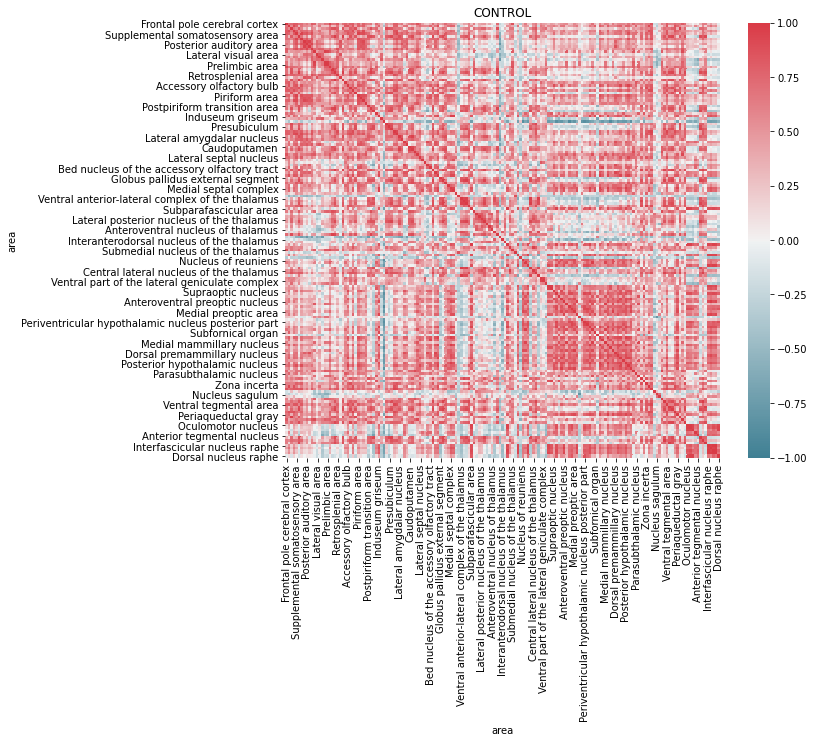

In [36]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

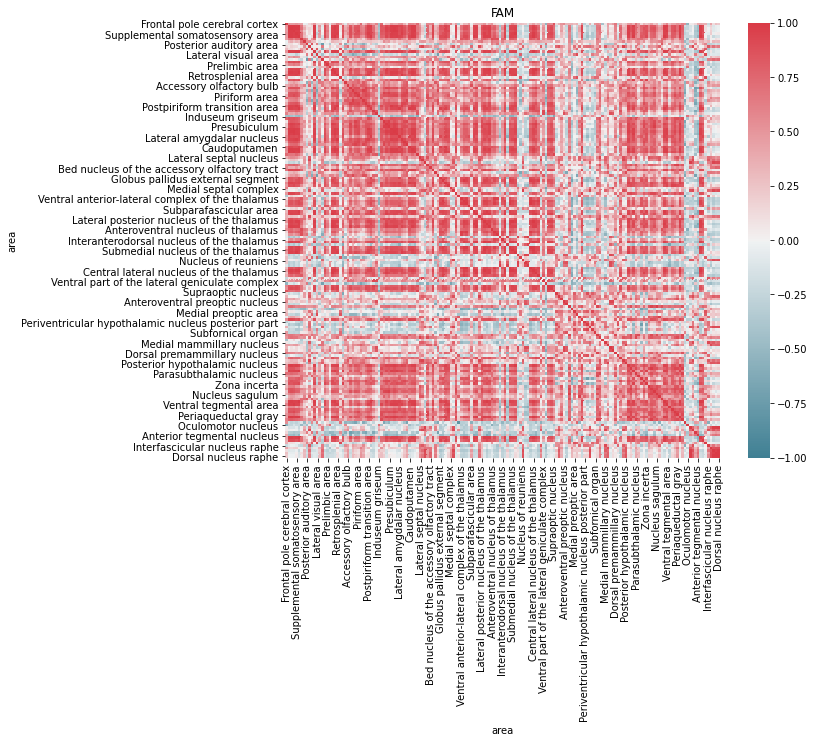

In [37]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

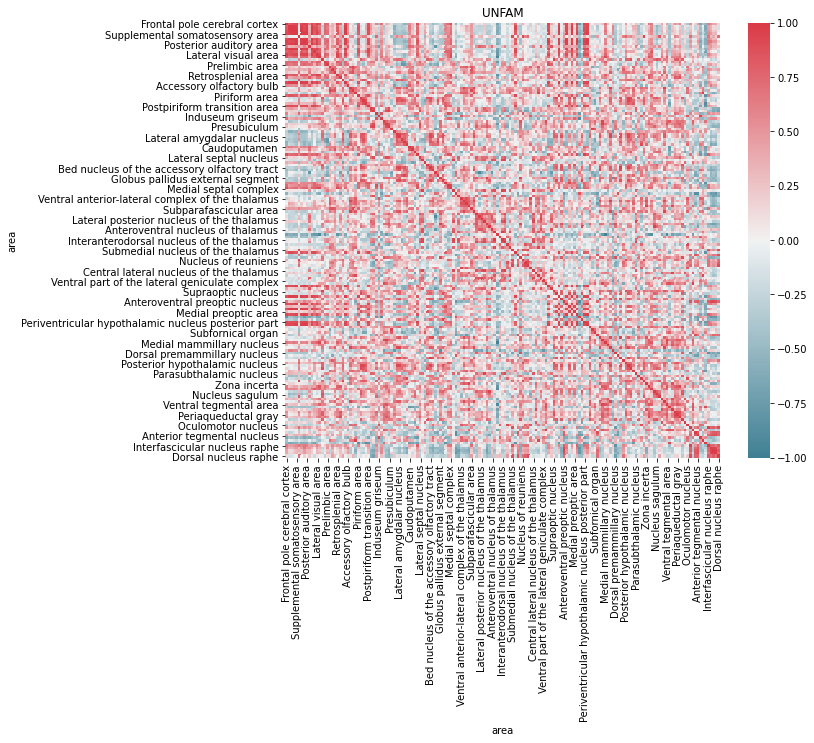

In [38]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# WILD without father

In [76]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_without_father'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]

In [40]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [41]:
def load_subject(subject):
    df_mouse = pd.read_csv(data_directory + subject + '/cells_700.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    return df_mouse

In [42]:
# # NB: Run only if file does not exist or needs to be regenerated
# dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject), 
#                                                                           vol=volumes, 
#                                                                           level=8) for subject in subjects}
# np.save('dict_results/dict_results_across_mice_WILD_without_father.npy', dict_results_across_mice)

In [70]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_WILD_without_father.npy', allow_pickle=True).item()

In [71]:
# remove W12Fam
dict_results_across_mice.pop('W12Fam')
subjects.pop(0)

,area,n_cells,energy
0,Frontal pole cerebral cortex,1,4465.112833
1,Primary motor area,9,6067.472955
2,Secondary motor area,7,2013.199631
3,Primary somatosensory area,41,12122.211664
4,Supplemental somatosensory area,9,8075.918189
...,...,...,...
194,Interfascicular nucleus raphe,0,0.000000
195,Interpeduncular nucleus,0,0.000000
196,Rostral linear nucleus raphe,0,0.000000
197,Central linear nucleus raphe,0,0.000000


In [79]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)


In [80]:
experimental_groups

{'Control': ['W10Control',
  'W38Control',
  'W26Control',
  'W15Control',
  'W31Control',
  'W23Control',
  'W7Control',
  'W29Control',
  'W3Control',
  'W17Control'],
 'Unfam': ['W6Unfam',
  'W24Unfam',
  'W35Unfam',
  'W4Unfam',
  'W28Unfam',
  'W39Unfam',
  'W37Unfam'],
 'Fam': ['W9Fam', 'W19Fam', 'W30Fam', 'W32Fam', 'W1Fam', 'W22Fam']}

# Calculate number of cells

In [81]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [82]:
df_ttest_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count)
df_ttest_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.17469,0.961098,0.32289
1,Primary motor area,0.533289,0.0734869,0.227819
2,Secondary motor area,0.178429,0.358246,0.0710862
3,Primary somatosensory area,0.466243,0.171333,0.605192
4,Supplemental somatosensory area,0.299102,0.15831,0.804133
...,...,...,...,...
194,Interfascicular nucleus raphe,0.834838,0.98968,0.816925
195,Interpeduncular nucleus,0.416387,0.952641,0.244753
196,Rostral linear nucleus raphe,0.809014,0.6478,0.814558
197,Central linear nucleus raphe,0.708366,0.306036,0.344137


In [83]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [84]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Parasubiculum,0.00293113
Supraoptic nucleus,0.00873831
Entorhinal area,0.0140751
Anterodorsal preoptic nucleus,0.0232918
Basolateral amygdalar nucleus,0.0278196
Lateral preoptic area,0.0285559
Postpiriform transition area,0.0343496
Posterior amygdalar nucleus,0.0424899
Anteroventral preoptic nucleus,0.0429055


In [85]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Postpiriform transition area,0.0028629
Piriform-amygdalar area,0.0103096
Subgeniculate nucleus,0.0167271
Agranular insular area,0.0168907
Perirhinal area,0.0172371
Olfactory tubercle,0.0223916
Entorhinal area,0.0232441
Cortical amygdalar area,0.0257908
Visceral area,0.0313911


In [86]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Lateral preoptic area,0.0167322
Medial preoptic area,0.0173137
Anteroventral preoptic nucleus,0.0246764
Parasubiculum,0.024795
Dorsomedial nucleus of the hypothalamus,0.0309599
Subgeniculate nucleus,0.0363834
Anterior cingulate area,0.0378811
Ventrolateral preoptic nucleus,0.0380614
Supraoptic nucleus,0.0422371


# Calculate corr matrices on number of cells

In [87]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

Text(0.5, 1.0, 'CONTROL')

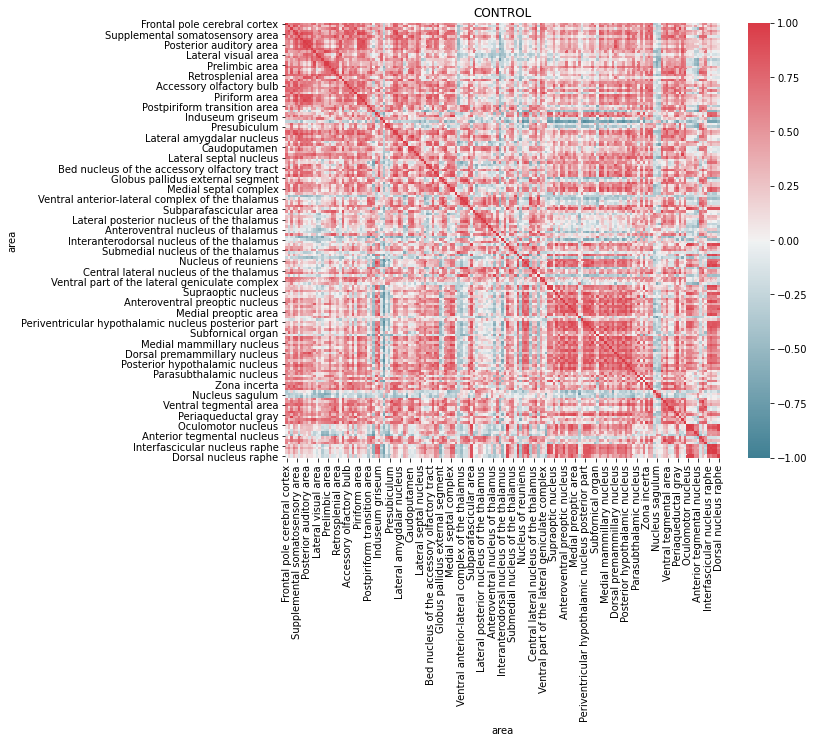

In [88]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

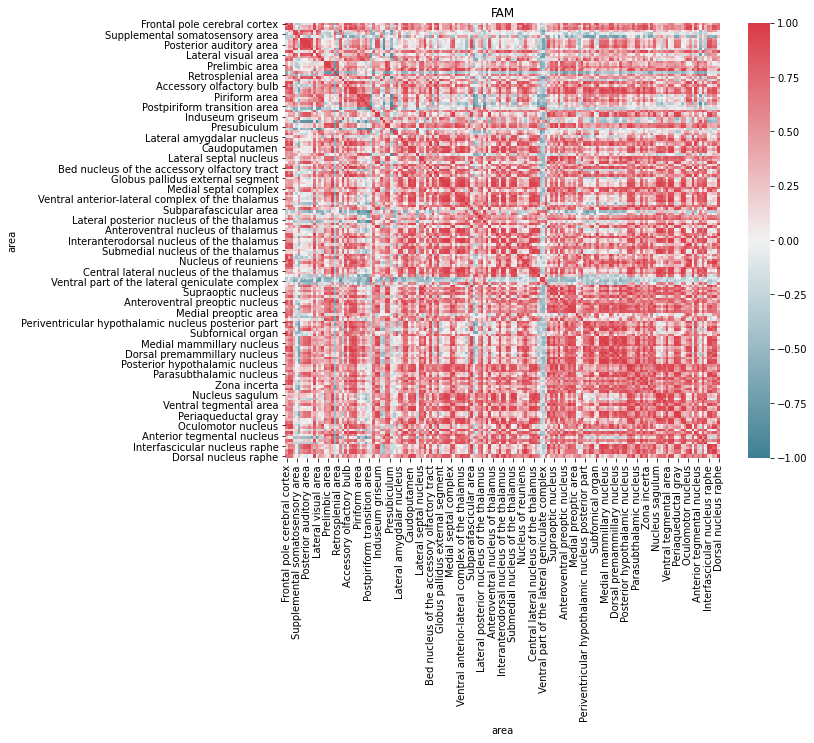

In [89]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

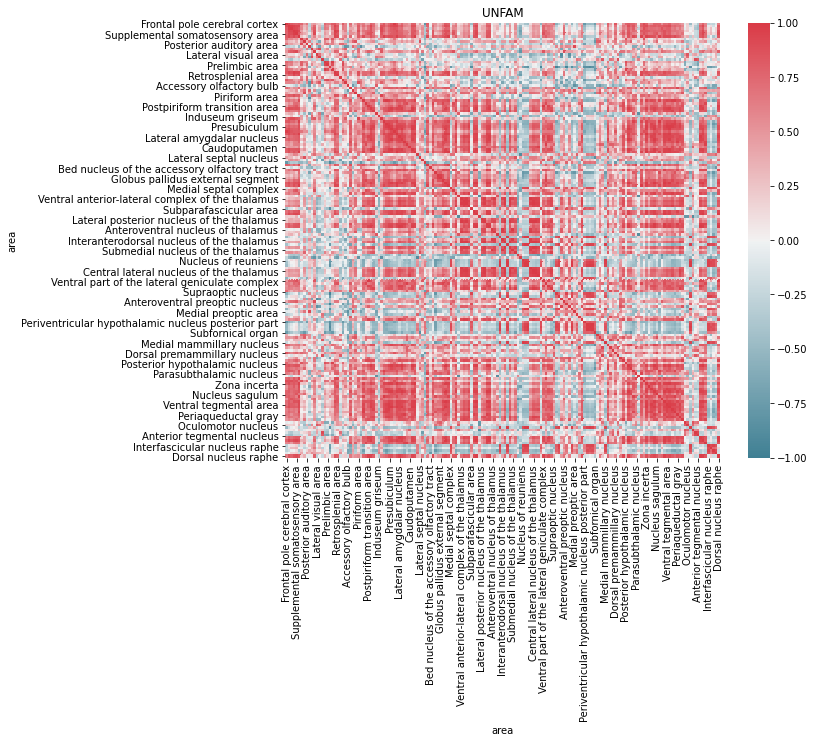

In [90]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate energy

In [91]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

In [92]:
df_ttest_energy = ace.test_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy)

In [93]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [94]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Parasubiculum,0.00391528
Entorhinal area,0.0111871
Supraoptic nucleus,0.0145872
Anterodorsal preoptic nucleus,0.0247606
Basolateral amygdalar nucleus,0.0259346
Postpiriform transition area,0.0312022
Lateral preoptic area,0.0322625
Posterior amygdalar nucleus,0.0402555
Red nucleus,0.049897


In [95]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Postpiriform transition area,0.00141701
Piriform-amygdalar area,0.00457684
Entorhinal area,0.00845881
Piriform area,0.00971327
Cortical amygdalar area,0.0133395
Agranular insular area,0.0134617
Perirhinal area,0.0225788
Primary motor area,0.024168
Subgeniculate nucleus,0.0281739


In [96]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Lateral preoptic area,0.00864736
Dorsomedial nucleus of the hypothalamus,0.0160713
Anterior cingulate area,0.0178491
Medial preoptic area,0.0276834
Prelimbic area,0.0294644
Supraoptic nucleus,0.0448901
Anteroventral preoptic nucleus,0.0470486
Parasubiculum,0.0533474
Subgeniculate nucleus,0.0619766


# Calculate corr matrix on energy

In [97]:
corr_matrix_control_energy = ace.cross_corr(df_control_energy)
corr_matrix_fam_energy = ace.cross_corr(df_fam_energy)
corr_matrix_unfam_energy = ace.cross_corr(df_unfam_energy)

Text(0.5, 1.0, 'CONTROL')

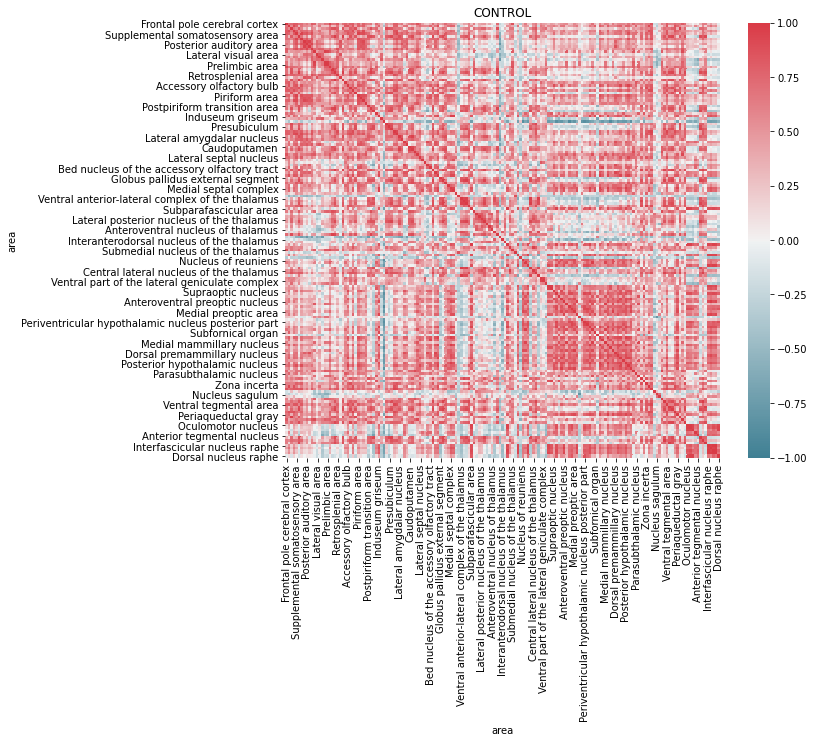

In [98]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

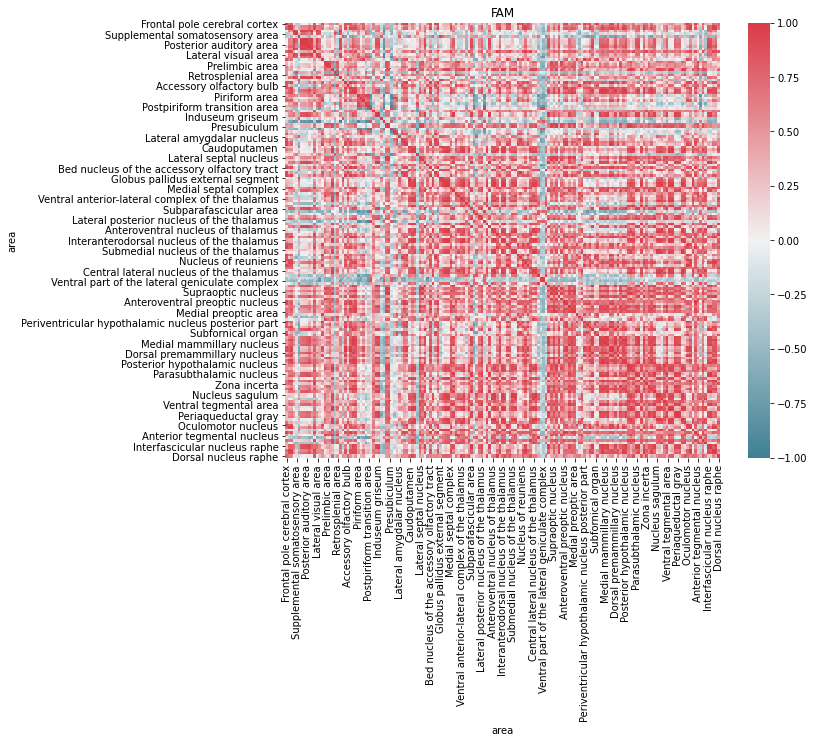

In [99]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

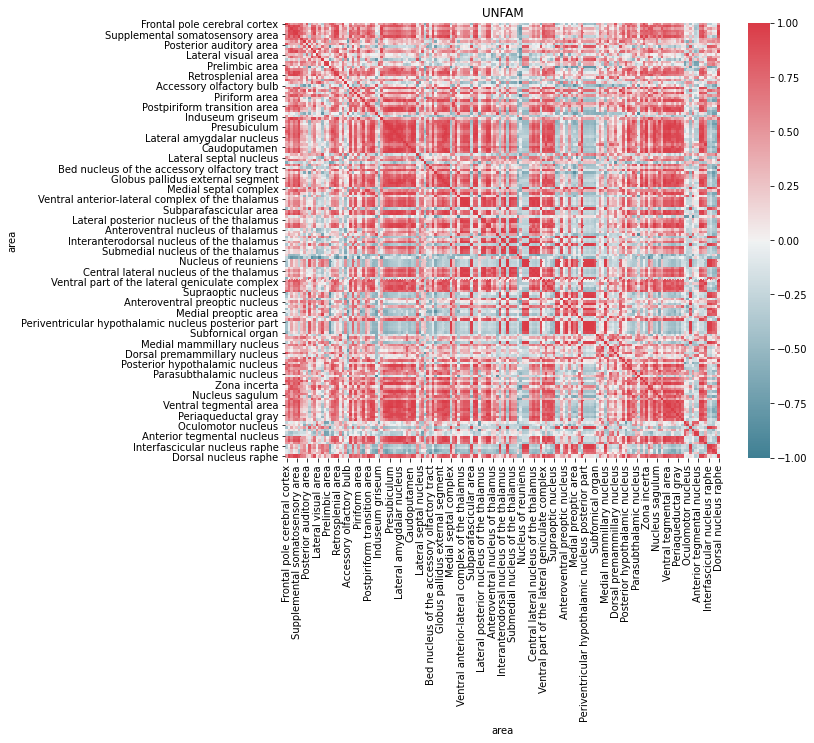

In [100]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')